# Лабораторная работа 2
# Анализ связей между признаками двумерного набора данных

**Цель работы**: изучение связи между признаками двумерного набора данных.

### Вариант задания:
	Вариант №15. Фитнес клуб
	Содержит информацию о посетителях фитнес клуба
1. Пол
2. Близкое расположение
3. Сотрудник компании партнера
4. По промо друзей
5. Указан ли телефон
6. Длительность текущего абонемента
7. Посещение групповых занятий
8. Возраст
9. Средние траты на доп услуги
10. Количество месяцев до окончания абонемента
11. Время с момента первого обращения в фитнес-центр (в месяцах) 
12. Средняя частота посещений
13. Средняя частота посещений в месяц
14. Ушел ли из фитнес клуба


В начале, импортируем исходный набор данных, и проведем первичную обработку, убрав строки с пустыми значениями и приведя названия столбцов к единому виду.

In [1]:
import pandas as pd
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
df = pd.read_csv('5и7gym_churn.csv')
df = df.rename(columns={'gender':'Gender'})
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [2]:
df = df.dropna(subset=['Gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age',
                       'Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total',
                       'Avg_class_frequency_current_month','Churn'])
df = df.drop_duplicates()
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

После приведения набора данных к нормальному виду, можно увидеть, что количество строк осталось неизменным. Поэтому далее, можно проводить анализ связи между признаками. В начале, можно изучить числовые характеристики при помощи метода describe()

In [3]:
df.describe()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


По полученным даннымможно сделать множество выводов по каждому из столбцов.
Так, видно следующее: так как среднее количество среди пола - 0.5, можно сделать вывод, что мужчин и женщин в клубе примерно равное количество; большинство посетителей живут рядом с клубом; примерно половина среди всех посетителей - сотрудник компании партер; по промо друзей пришло в клуб лишь треть; 90% посетителей указали номер телефона, а значит, с большинством посетителей можно связаться в будущем; в среднем длительность абонемента составляет 4,5 месяцев; на групповые занятия ходит только 40% посетителей; Средний возраст 29 лет, причем минимальный возраст - 18 лет, а максимальный - 41; средние траты на дополнительные услуги составляет 147 рублей, причем максимум превышает средние затраты в пять раз; максимальный контракт составляет 12 месяцев; в среднем, клиенты посещают клуб 3-4 месяца, причем максимум составлял год; наконец, из фитнес клуба ушло 26% клиентов.

Таким образом, можно уже, при помощи одной таблицы, огромное количество выводов, проанализировать показатели, которые получили, и сделать предварительные выводы.

Однако, необходимо выяснить причины появления таких показателей, особенно от чего завсит количество ушедших клиентов. Для этого, необходимо провести анализ зависимости показателей друг от друга.

Далее, построим матрицу диаграмм рассеяния для всех полей. Ниже представлены все диаграммы.

array([[<AxesSubplot: xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot: xlabel='Near_Location', ylabel='Gender'>,
        <AxesSubplot: xlabel='Partner', ylabel='Gender'>,
        <AxesSubplot: xlabel='Promo_friends', ylabel='Gender'>,
        <AxesSubplot: xlabel='Phone', ylabel='Gender'>,
        <AxesSubplot: xlabel='Contract_period', ylabel='Gender'>,
        <AxesSubplot: xlabel='Group_visits', ylabel='Gender'>,
        <AxesSubplot: xlabel='Age', ylabel='Gender'>,
        <AxesSubplot: xlabel='Avg_additional_charges_total', ylabel='Gender'>,
        <AxesSubplot: xlabel='Month_to_end_contract', ylabel='Gender'>,
        <AxesSubplot: xlabel='Lifetime', ylabel='Gender'>,
        <AxesSubplot: xlabel='Avg_class_frequency_total', ylabel='Gender'>,
        <AxesSubplot: xlabel='Avg_class_frequency_current_month', ylabel='Gender'>,
        <AxesSubplot: xlabel='Churn', ylabel='Gender'>],
       [<AxesSubplot: xlabel='Gender', ylabel='Near_Location'>,
        <AxesSubplot: xlabe

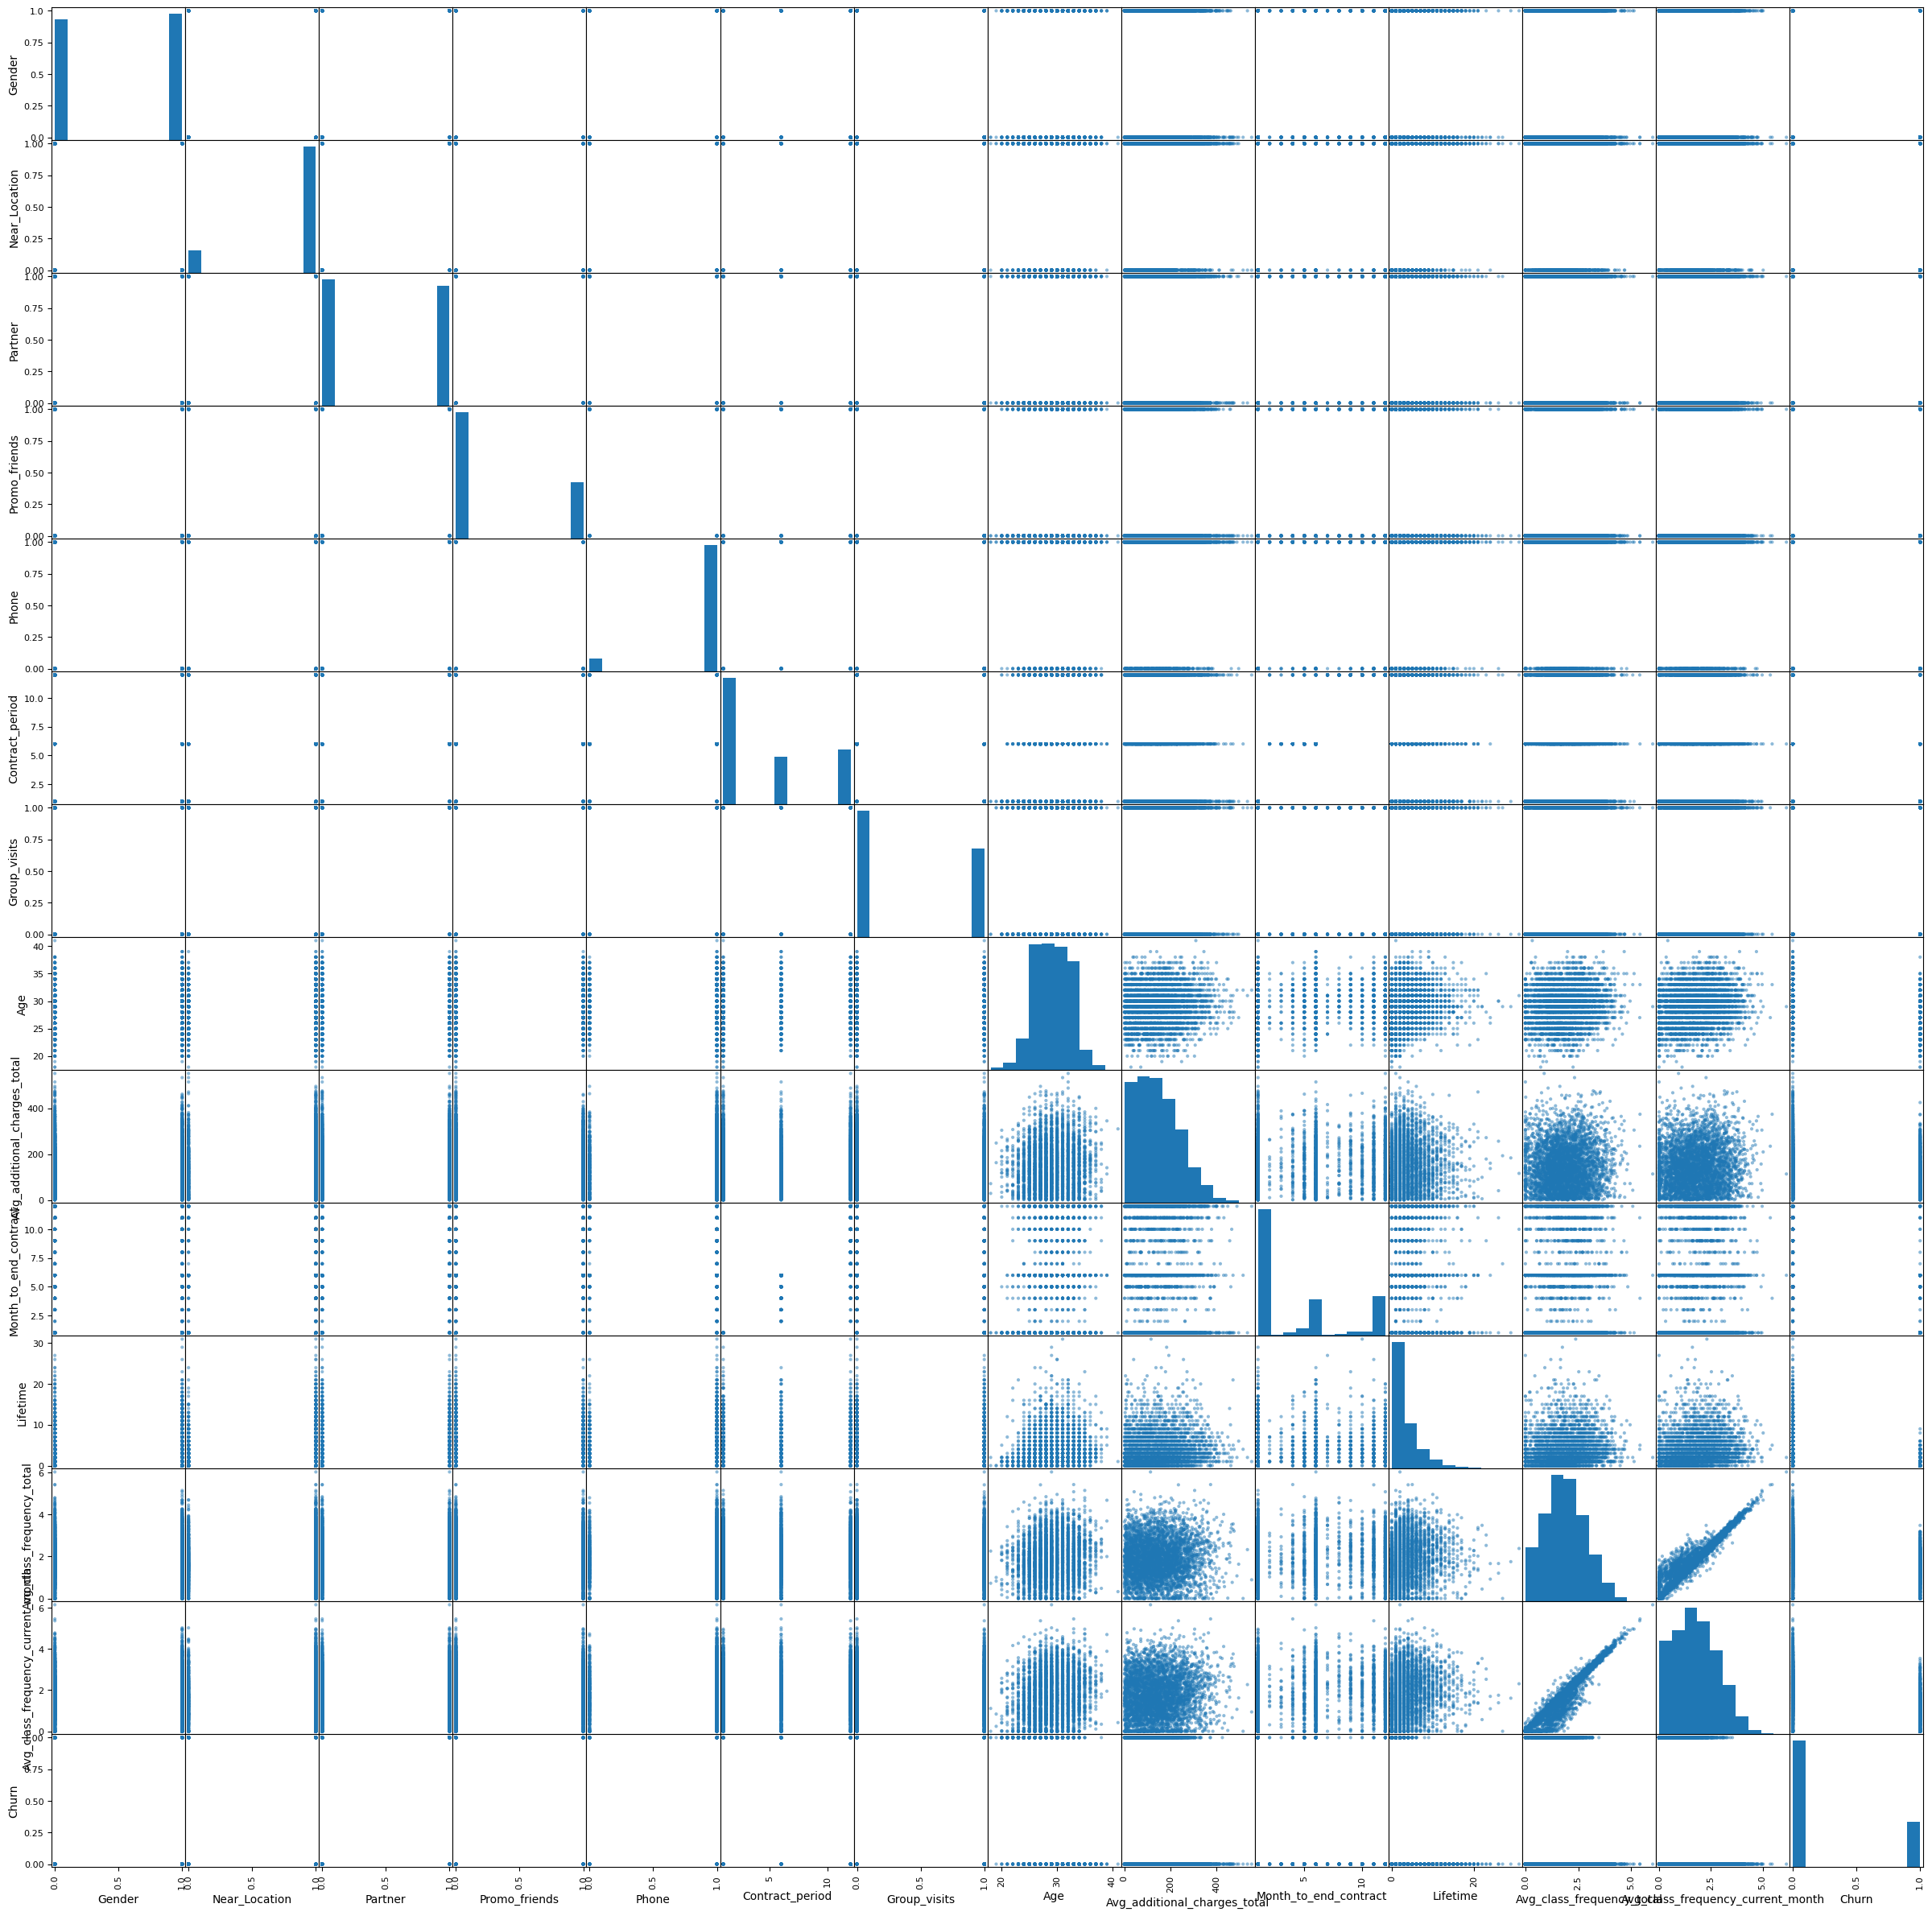

In [4]:
pd.plotting.scatter_matrix(df,figsize = (30,30))

В матрице можно увидеть, что большинство полей не коррелируют друг с другом, первые 7 полей имеют только два значения, следующие поля либо рассеяны, либо все же имеют корреляцию друг с другом. Однако, имеются два поля, которые явно коррелируют друг с другом: 'Avg_class_frequency_current_month' и 'Avg_class_frequency_total'. Ниже представлены диаграммы в увеличенном виде.

array([[<AxesSubplot: xlabel='Avg_class_frequency_current_month', ylabel='Avg_class_frequency_current_month'>,
        <AxesSubplot: xlabel='Avg_class_frequency_total', ylabel='Avg_class_frequency_current_month'>],
       [<AxesSubplot: xlabel='Avg_class_frequency_current_month', ylabel='Avg_class_frequency_total'>,
        <AxesSubplot: xlabel='Avg_class_frequency_total', ylabel='Avg_class_frequency_total'>]],
      dtype=object)

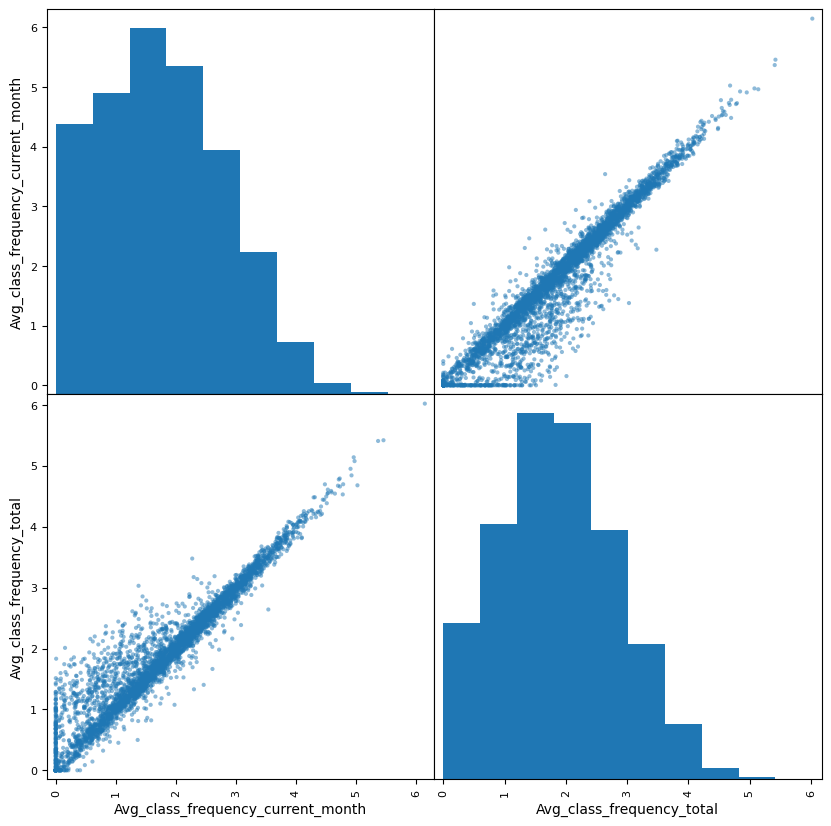

In [5]:
pd.plotting.scatter_matrix(df[['Avg_class_frequency_current_month','Avg_class_frequency_total']],figsize = (10,10))

Таким образом, первым средством анализа связей является матрица диаграмм рассеяния. С их помощью, можно быстро провести поверхностный анализ, и найти значения. которые могут коррелировать друг с другом. Так, в ходе работы была найдена явная взаимосвязь по расположению значений между частотой посещений за все время и за данный месяц. Было определено, что чем больше посещают в месяц, тем больше посещают в течении года, а значит, если в течении месяца человек часто ходил на занятия, то он будет ходить и в течении года.

Далее, можно посмотреть значение корреляции при помощи метода corr(). Видно, что сами с собой они коррелируют с значением 1, так как это одни и те же значения, а вот два разных параметры коррелируют с значением 0.95, поэтому можно утверждать, что данные зависят друг от друга.

In [6]:
df[['Avg_class_frequency_current_month','Avg_class_frequency_total']].corr()

,Avg_class_frequency_current_month,Avg_class_frequency_total
Avg_class_frequency_current_month,1.000000,0.952739
Avg_class_frequency_total,0.952739,1.000000


Кроме этого, можно посмотреть коэффициент ковариации. Аналогично видно, что у двух разных столбцов коэффициент ковариации почти равен единице. 

In [7]:
df[['Avg_class_frequency_current_month','Avg_class_frequency_total']].cov()

,Avg_class_frequency_current_month,Avg_class_frequency_total
Avg_class_frequency_current_month,1.108610,0.975302
Avg_class_frequency_total,0.975302,0.945260


Однако, при помощи того же метода можно посмотреть и коэффициенты корреляции для всех столбцов.

In [8]:
df.corr()

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Таким образом, второе средство для анализа связей - построение матрицы коэффициентов корреляции и ковариации. Данные коэффициенты позволяют определить взаимосвязь между значениями и найти некоторую количественную меру для этих полей. Однако, как было продемонстрировано, по матрице корреляции взаимосвязанные значения искать сложно из-за большого количества чисел. Вместо этого, лучше воспользоваться тепловой картой корреляции. Она строится при помощи того же метода для расчета корреляции. Построение карты выплоняется при помощи импортированной ранее библиотеки seaborn

<AxesSubplot: >

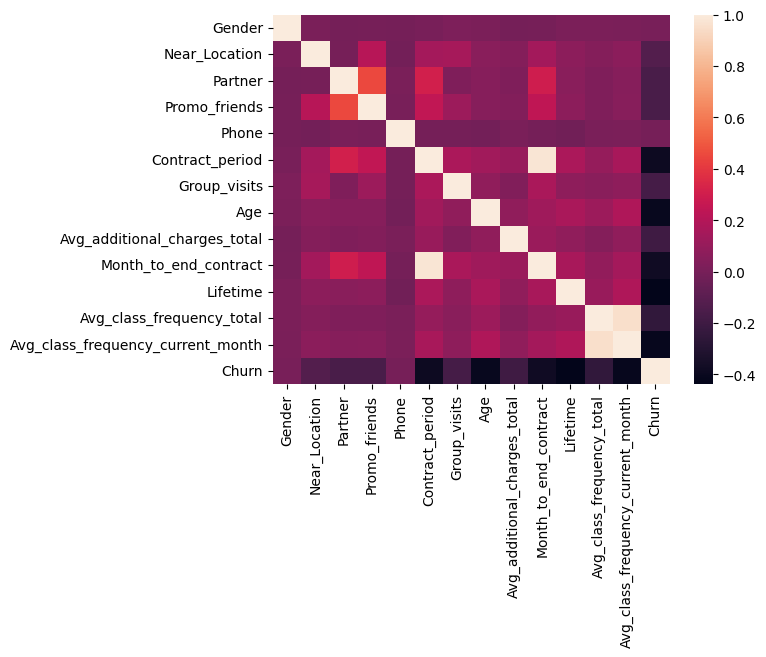

In [9]:
sns.heatmap(df.corr(), annot=False)

Таким образом видно, что можно почти мгновенной найти поля, которые также коррелируют друг с другом. Например, это 'Contract_period' и 'Month_to_end_contract'. Построим диаграммы для этих полей:

array([[<AxesSubplot: xlabel='Avg_class_frequency_current_month', ylabel='Avg_class_frequency_current_month'>,
        <AxesSubplot: xlabel='Avg_class_frequency_total', ylabel='Avg_class_frequency_current_month'>,
        <AxesSubplot: xlabel='Contract_period', ylabel='Avg_class_frequency_current_month'>,
        <AxesSubplot: xlabel='Month_to_end_contract', ylabel='Avg_class_frequency_current_month'>],
       [<AxesSubplot: xlabel='Avg_class_frequency_current_month', ylabel='Avg_class_frequency_total'>,
        <AxesSubplot: xlabel='Avg_class_frequency_total', ylabel='Avg_class_frequency_total'>,
        <AxesSubplot: xlabel='Contract_period', ylabel='Avg_class_frequency_total'>,
        <AxesSubplot: xlabel='Month_to_end_contract', ylabel='Avg_class_frequency_total'>],
       [<AxesSubplot: xlabel='Avg_class_frequency_current_month', ylabel='Contract_period'>,
        <AxesSubplot: xlabel='Avg_class_frequency_total', ylabel='Contract_period'>,
        <AxesSubplot: xlabel='Contract_p

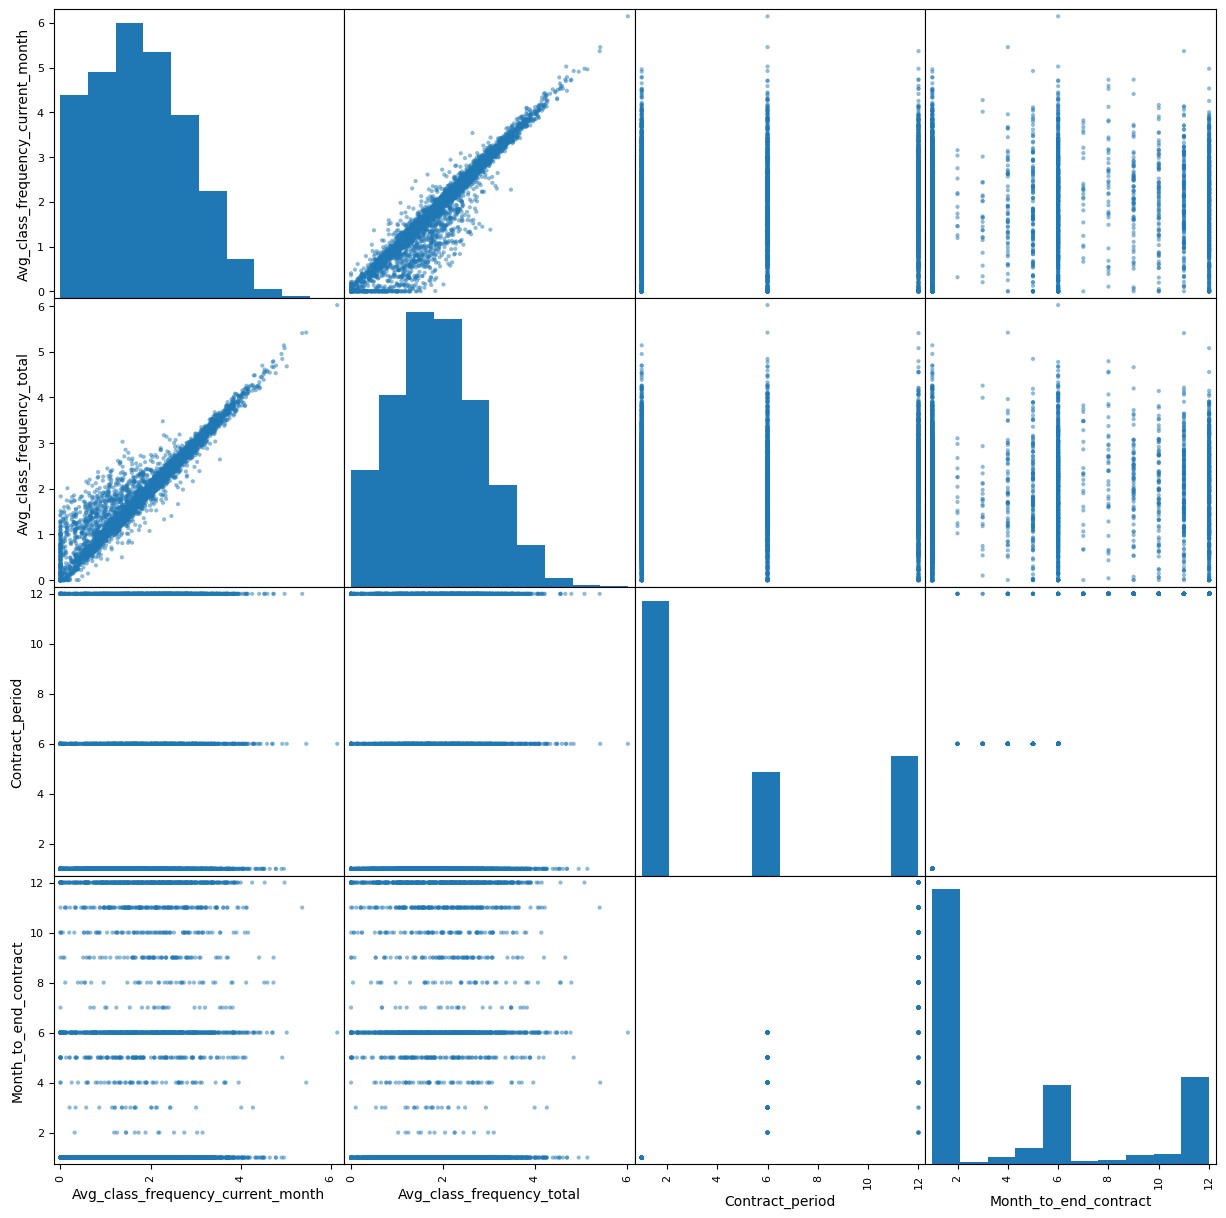

In [10]:
pd.plotting.scatter_matrix(df[['Avg_class_frequency_current_month','Avg_class_frequency_total',
                               'Contract_period','Month_to_end_contract']],figsize = (15,15)) 

Можно увидеть, что по диаграмме корреляция почти не видна, но по коэффициенту все же можно убедиться, что данные связаны друг с другом. Вероятнее всего, это связано с тем, что месяц окончания связан с периодом контракта; месяц окончания должен быть не позже периода контракта и чаще всего эти месяцы совпадают, поэтому, видна корреляция.

Однако, нашим целевым признаком, в данном случае, является количество ушедших клиентов. И по тепловой карте можно увидеть, что, пусть и слабая зависимость, имеется у возраста и у времени с первого посещения. У данных параметров наиболее явная корреляция. Найдем их коэффициенты корреляции

In [11]:
df[['Churn','Lifetime','Age']].corr()

,Churn,Lifetime,Age
Churn,1.000000,-0.438220,-0.404735
Lifetime,-0.438220,1.000000,0.164693
Age,-0.404735,0.164693,1.000000


Таким образом видно, что у возраста и времени с первого посещения между выходом из клуба имеется обратная связь. Таким образом, при увеличении времени посещения клуба шанс ухода уменьшается, а также с увеличением возраста также уменьшается шанс ухода из клуба. То есть, можно сделать вывод о том, что молодые люди и люди, которые отзанимались небольшое количество времени чаще уходят из клуба. 

Однако, к данным реультатам необходимо относиться с осторожностью, так как коэффициент корреляции меньше 0.5, а значит, при большей выборке данные выводы могут быть ошибочными. Но в качестве предварительного и промежуточного вывода можно предпринимать действия для завлечения молодой аудитории и побуждения их остаться.

Помимо коэффициента корреляции, при помощи тепловой карты можно отобразить и тепловую карту ковариации. Ниже видна карта ковариации с отображением значений в каждой ячейке.

<AxesSubplot: >

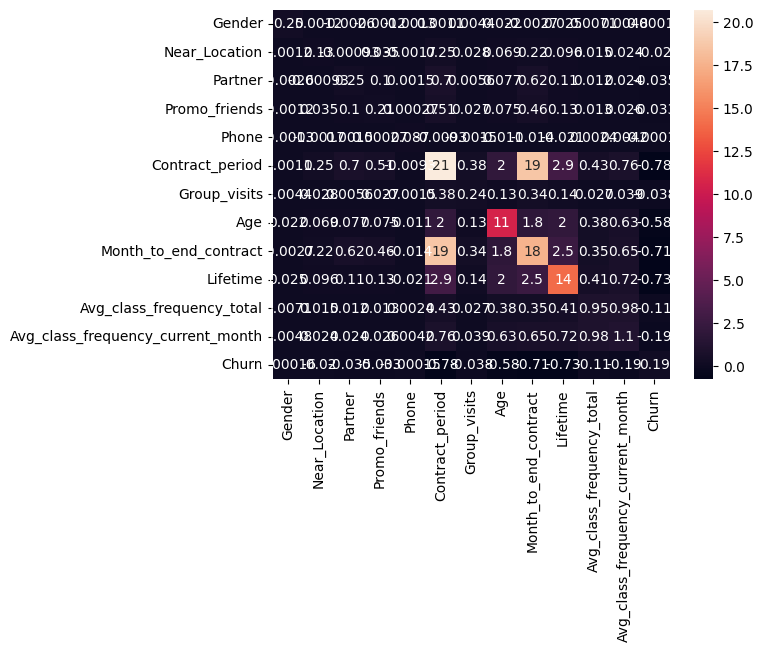

In [12]:
sns.heatmap(df[['Gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age',
                       'Month_to_end_contract','Lifetime','Avg_class_frequency_total',
                       'Avg_class_frequency_current_month','Churn']].cov(), annot=True)

Таким образом, третьим средством анализа связей является построение тепловых карт. Данные тепловые карты позволяют отобразить коэффициенты корреляции при помощи цвета, что позволяет почти мгновенно найти взаимосвязанные величины. Так, была найдены поля с длительностью контрактов и временем окончания контракта. Ранее, по диаграмме рассеяния это было заменить невозможно, но по коэффициенту корреляции можно увидеть, что данные величны связаны.

### Выводы:
В результате проведённой работы были проанализированы связи между признаками двумерного набора данных.
В ходе работы, после необходимой очистки данных от дубликатов, пустых значений и так далее, был произведен анализ всех полей в наборе данных. Данный анализ был проведен при помощи нескольких средств: матрицы диаграмм рассеяния, коэффициентов корреляции и тепловой карты корреляции и ковариации.

Так, в ходе работы были проанализированы отдельные признаки по каждому из полей. Например, можно сделать вывод о возрасте посетителей (средний возраст составляет 29 лет), о полах посетителей (мужчин и женщин в клубе примерно равное количество), а также о количестве ушедших (это количество составляет чуть больше четверти от всех клиентов). Все эти показатели так или иначе влияют на потенциальный курс фитнес клуба, и их анализ позволяет принять верные решения о модернизации клуба или об изменении курса работы для уменьшения оттока клиентов.

Кроме отдельного аналзиа каждых признаков, были проанализированы связи между полями. Так, была замечена явная корреляция между частотой посещений классов в месяц и за все время, а также период договора и количеством месяцов до окончания договоров. Между данными параметрами выявлена явная корреляция, но она является очевидной в виду природы данных значений (в обоих параметрах фигурируют одни и те же параметры, но представленные в разных формах)

Наконец, можно проанализировать целевой признак, который является наиболее важным при анализе данных - отток клиентов (Churn). Данный признак больше всего влияет на итоговую прибыль так как чем меньше клиентов останется, тем меньше будет прибыли у клуба. В связи с этим, была выявлена зависимость оттока от возраста и времени нахождения в клубе. Можно сделать явный вывод о том, что молодые люди наиболее часто покидают клуб, а также люди, которые пришли относительно недавно. Клиенты, которые провели много времени в клубе, не спешат уходить, а значит, необходимо нацелится на удержание аудитории, а также необходимо проанализировать причины ухода из клуба, которые, судя по тепловой карте, не относятся к параметрам данного набора данных.

Таким образом видно, что имеются разные способы определения взаимосвязи величин, которые позволяют сделать выводы о тенденции работы клуба и последюущего развития. Несмотря на то, что инструменты для анализа являются не сложными, они позволяют получить колоссальный объем данных и позволяют собрать большой объем данных для набилоее точного анализа данных.
